#**Goal:** find the number of wins per team in the regular season

##Next steps:
* Make a model for the data
* Train the data
* Validate the data
* Test the data
* Visualizations
* Report

## Downloading the data
api: https://pypi.org/project/pro-football-reference-web-scraper/

In [ ]:
!pip install pro-football-reference-web-scraper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pro-football-reference-web-scraper: filename=pro_football_reference_web_scraper-0.2.1-py3-none-any.whl size=19389 sha256=cb0ea4ab527e1da51352d5edf272e5676599834d8a7f4f78fb0404a4730e52c9
  Stored in directory: /root/.cache/pip/wheels/65/38/6d/d8f09f175601dfca3078b7c62be2588f033b90c0d322c38b8e
Successfully built pro-football-reference-web-scraper


Pandas html scraper: https://stmorse.github.io/journal/pfr-scrape-python.html

In [ ]:
import pandas as pd
url = 'https://www.pro-football-reference.com/players/W/WilsRu00/fantasy/2018/'
df = pd.read_html(url)[0]
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
                  Rk                 G#               Date                 Tm   
0                1.0                1.0         2018-09-09                SEA   
1                2.0                2.0         2018-09-17                SEA   
2                3.0                3.0         2018-09-23                SEA   
3                4.0                4.0         2018-09-30                SEA   
4                5.0                5.0         2018-10-07                SEA   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1 Unnamed: 7_level_1   
  Unnamed: 4_level_2                Opp             Result                Pos   
0                  @                DEN            L 24-27                 QB   
1                  @                CHI            L 17-24                 QB   
2                NaN                DAL            W 24-13                 QB   
3                  @                ARI            W 20-17                 QB   
4                NaN                LAR            L 31-33                 QB   

  Inside 20      ... Inside 10 Snap Counts                               \
    Passing      ...   Rushing        Off.         Def.        ST         
        Cmp Att  ...        TD         Num     Pct  Num   Pct Num   Pct   
0         1   3  ...         0          57  100.0%    0  0.0%   0  0.0%   
1         3   4  ...         0          66  100.0%    0  0.0%   0  0.0%   
2         2   2  ...         0          69  100.0%    0  0.0%   0  0.0%   
3         0   1  ...         0          66  100.0%    0  0.0%   0  0.0%   
4         2   2  ...         0          60  100.0%    0  0.0%   0  0.0%   

  Unnamed: 28_level_0 Unnamed: 29_level_0 Unnamed: 30_level_0  
              Fantasy             Fantasy             Fantasy  
               FantPt                DKPt                FDPt  
0               20.42                22.4                22.4  
1               14.74                16.7                15.7  
2               15.58                15.6                15.6  
3                8.98                 9.0                 9.0  
4               19.92                19.9                19.9  

[5 rows x 31 columns]

In [ ]:
bills_df = pd.read_html("https://www.pro-football-reference.com/teams/buf/2022.htm")[0]
bills_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Tot Yds & TO       \
              Player                 PF                Yds          Ply  Y/P   
0         Team Stats                455               6361       1037.0  6.1   
1         Opp. Stats                286               5106        997.0  5.1   
2    Lg Rank Offense                  2                  2          NaN  NaN   
3    Lg Rank Defense                  2                  6          NaN  NaN   

      Unnamed: 6_level_0 Unnamed: 7_level_0 Passing       ... Penalties        \
   TO                 FL               1stD     Cmp  Att  ...       Yds 1stPy   
0  27                 13                367   361.0  574  ...     709.0  27.0   
1  27                 10                313   362.0  570  ...     754.0  29.0   
2  31                 31                  2     NaN    8  ...       NaN   NaN   
3   4                 10                 17     NaN   28  ...       NaN   NaN   

  Unnamed: 23_level_0 Unnamed: 24_level_0 Unnamed: 25_level_0 Average Drive  \
                  #Dr                 Sc%                 TO%         Start   
0               171.0                45.0                15.2      Own 30.0   
1               168.0                31.0                14.3      Own 27.9   
2                 NaN                 2.0                 2.0             5   
3                 NaN                30.0                 5.0             9   

                            
   Time  Plays   Yds   Pts  
0  2:47   6.25  37.1  2.52  
1  2:55   6.10  30.3  1.67  
2    17   9.00   2.0  2.00  
3    29  24.00  13.0  5.00  

[4 rows x 31 columns]

In [ ]:
teams = [
    'Arizona Cardinals',
    'Atlanta Falcons',
    'Baltimore Ravens',
    'Buffalo Bills',
    'Carolina Panthers',
    'Chicago Bears',
    'Cincinnati Bengals',
    'Cleveland Browns',
    'Dallas Cowboys',
    'Denver Broncos',
    'Detroit Lions',
    'Green Bay Packers',
    'Houston Texans',
    'Indianapolis Colts',
    'Jacksonville Jaguars',
    'Kansas City Chiefs',
    'Las Vegas Raiders',
    'Los Angeles Chargers',
    'Los Angeles Rams',
    'Miami Dolphins',
    'Minnesota Vikings',
    'New England Patriots',
    'New Orleans Saints',
    'New York Giants',
    'New York Jets',
    'Philadelphia Eagles',
    'Pittsburgh Steelers',
    'San Francisco 49ers',
    'Seattle Seahawks',
    'Tampa Bay Buccaneers',
    'Tennessee Titans',
    'Washington Commanders'
]

train_years = [2015, 2016, 2017, 2018, 2019, 2020]
test_years = [2021, 2022]

In [ ]:
from pro_football_reference_web_scraper import team_game_log as t
import time

def fetch_team_game_logs(teams, train_years):
    # Initialize an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate through each team and training year
    for team in teams:
        for year in train_years:
            time.sleep(4)
            print(team, year)
            # Fetch the game log for the current team and year
            game_log = t.get_team_game_log(team=team, season=year)

            team_df = pd.DataFrame(game_log)

            # Add columns for team and year
            team_df['team'] = team
            team_df['year'] = year

            # Append the team's game log to the combined DataFrame
            combined_df = combined_df.append(team_df, ignore_index=True)

    return combined_df

In [ ]:
#data = fetch_team_game_logs(teams, train_years)

In [ ]:
#game_log = tl.get_team_game_log(team = 'Las Vegas Raiders', season = 2015)
#game_log.head()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
filepath = '/content/drive/Shared drives/M148Project/train_data.csv'

train_data = pd.read_csv(filepath)

filepath = '/content/drive/Shared drives/M148Project/test_data.csv'
test_data = pd.read_csv(filepath)

print("Train")
print(train_data.head())
print("\nTest")
print(test_data.head())

Train
                Team  Year Total_Rest_Days  Total_Distance_Traveled  \
0  Arizona Cardinals  2015        122 days             11709.954942   
1  Arizona Cardinals  2016        122 days             10602.459038   
2  Arizona Cardinals  2017        122 days             10284.258794   
3  Arizona Cardinals  2018        122 days              7852.459252   
4  Arizona Cardinals  2019        122 days             10868.190349   

   Total_Points_For  Total_Points_Allowed  Total_Yards  Rush_Yards  \
0               489                   313         6533        1917   
1               418                   362         5868        1732   
2               295                   361         5026        1386   
3               225                   425         3865        1342   
4               361                   442         5467        1990   

   Pass_Yards  Total_Opp_Yards  Opp_Rush_Yards  Opp_Pass_Yards  Win_Percentage  
0        4616             5147            1460            3687   

## Training with SOS

In [ ]:
X_train = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_train_data_with_avgs.csv')
y_train = X_train["Win_Percentage"]
X_train = X_train.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)
X_test = pd.read_csv('/content/drive/Shared drives/M148Project/CSVs/new_test_data_with_avgs.csv')
y_test = X_test["Win_Percentage"]
X_test = X_test.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days', 'Playoff'], axis = 1)
X_test.head()

,Total_Distance_Traveled,Total_Points_For,Total_Points_Allowed,Total_Yards,Rush_Yards,Pass_Yards,Total_Opp_Yards,Opp_Rush_Yards,Opp_Pass_Yards,PF_Per_Game,...,Rush_Yds_Per_Game,Pass_YDs_Per_game,Opp_Yds_Per_Game,Opp_Rush_Yds_Per_game,Opp_Pass_Yds_Per_game,PD,Yds_DIff,PD_Per_Game,Yds_Diff_Per_Game,SOS
0,11029.604150,449,366,6352,2076,4276,5597,1952,3645,26.411765,...,122.117647,251.529412,329.235294,114.823529,214.411765,83,755,4.882353,44.411765,0.31
1,7582.250614,340,449,5499,1873,3626,5931,2016,3915,20.000000,...,110.176471,213.294118,348.882353,118.588235,230.294118,-109,-432,-6.411765,-25.411765,0.21
2,6208.864683,313,459,5164,1451,3713,6194,2242,3952,18.411765,...,85.352941,218.411765,364.352941,131.882353,232.470588,-146,-1030,-8.588235,-60.588235,0.10
3,6662.598089,365,386,5417,2718,2699,6156,2214,3942,21.470588,...,159.882353,158.764706,362.117647,130.235294,231.882353,-21,-739,-1.235294,-43.470588,-0.88
4,6496.672853,387,392,6440,2479,3961,6178,1436,4742,22.764706,...,145.823529,233.000000,363.411765,84.470588,278.941176,-5,262,-0.294118,15.411765,0.01


In [ ]:
x_train = train_data.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days'], axis = 1)
y_train = train_data['Win_Percentage']

print(x_train.head())
print(y_train.head())
print(test_data.info())

   Total_Distance_Traveled  Total_Points_For  Total_Points_Allowed  \
0             11709.954942               489                   313   
1             10602.459038               418                   362   
2             10284.258794               295                   361   
3              7852.459252               225                   425   
4             10868.190349               361                   442   

   Total_Yards  Rush_Yards  Pass_Yards  Total_Opp_Yards  Opp_Rush_Yards  \
0         6533        1917        4616             5147            1460   
1         5868        1732        4136             4883            1518   
2         5026        1386        3640             4973            1432   
3         3865        1342        2523             5741            2479   
4         5467        1990        3477             6432            1922   

   Opp_Pass_Yards  
0            3687  
1            3365  
2            3541  
3            3262  
4            4510  
0    0.8

In [ ]:
x_test = test_data.drop(['Team', 'Year', 'Win_Percentage', 'Total_Rest_Days'], axis = 1)
y_test = test_data['Win_Percentage']

print(x_test.head())
print(y_test.head())

   Total_Distance_Traveled  Total_Points_For  Total_Points_Allowed  \
0             11029.604154               449                   366   
1              7582.250614               340                   449   
2              6208.864683               313                   459   
3              6662.598089               365                   386   
4              6496.672853               387                   392   

   Total_Yards  Rush_Yards  Pass_Yards  Total_Opp_Yards  Opp_Rush_Yards  \
0         6352        2076        4276             5597            1952   
1         5499        1873        3626             5931            2016   
2         5164        1451        3713             6194            2242   
3         5417        2718        2699             6156            2214   
4         6440        2479        3961             6178            1436   

   Opp_Pass_Yards  
0            3645  
1            3915  
2            3952  
3            3942  
4            4742  
0    0.6

In [ ]:
common_columns = set(test_data.columns) & set(train_data.columns)
unique_to_test = set(test_data.columns) - set(train_data.columns)
unique_to_train = set(train_data.columns) - set(test_data.columns)

print(common_columns)
print("Only in test")
print(unique_to_test)
print("\nOnly in train")
print(unique_to_train)

# test_data = test_data.rename(columns={'Avg_Pass_Yards': 'Pass_YDs_Per_game', 'Avg_Opp_Yards': 'Opp_Yds_Per_Game',
#                                       'Avg_Points_Allowed': 'PA_Per_Game', 'Avg_Rush_Yards': 'Rush_Yds_Per_Game',
#                                       'Avg_Opp_Pass_Yards': 'Opp_Pass_Yds_Per_game', 'Avg_Points_For': 'PF_Per_Game',
#                                       'Avg_Yards': 'Yds_Per_game', 'Avg_Opp_Rush_Yards': 'Opp_Rush_Yds_Per_game'})


{'Team', 'Total_Rest_Days', 'Opp_Rush_Yards', 'Total_Points_Allowed', 'Win_Percentage', 'Total_Points_For', 'Total_Opp_Yards', 'Year', 'Total_Yards', 'Rush_Yards', 'Opp_Pass_Yards', 'Total_Distance_Traveled', 'Pass_Yards'}
Only in test
set()

Only in train
set()


## Making the Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

# 4. Make predictions
y_pred = model.predict(x_test)
y_pred_actual_wins = y_pred * 17
print(y_pred_actual_wins)

y_test_actual_wins = y_test * 17

# 5. Compute the mean squared error of the model
MSE = mean_squared_error(y_test_actual_wins, y_pred_actual_wins)

print('\n')
print(MSE)

[10.67875502  4.88936773  3.90260546  8.08990349  8.09184557  9.51407049
 13.70582915 13.35121074  5.08537485  7.97755158  5.1241586   4.10661502
 11.16944823 11.48352562  7.22336383  7.12328219 13.53579277 12.2979432
  8.74320134  5.80167106  3.92368587  8.90421227 10.63031344  7.99002632
  3.55799026  4.5352587  11.41554795  3.76288817  1.78809389 10.09716794
 11.79947722 11.58167517  5.71214787  7.63801901  8.25862564  8.04852113
 11.20772299  6.60684833  7.73651816  8.05542356  8.34596049  8.38188694
 13.29358073  9.23922875  9.89837121  7.38753263  3.65771928  8.15113032
  2.55107779  7.44876339 10.11363648 11.72637134  6.66273387  7.07169074
  9.84795959 13.91033475 10.23008277  8.37843302 12.9698461   6.280216
 10.80132838  7.33542991]


2.523089034325055


In [ ]:
y_pred = model.predict(x_test)
y_pred_actual_wins = y_pred * 17

less_than_one = 0
over_one = 0
# Assuming y_test_actual_wins and y_pred_actual_wins are NumPy arrays or lists
for actual, predicted in zip(y_test_actual_wins, y_pred_actual_wins):
    print(f"Actual: {actual}, Predicted: {predicted}, Difference: {abs(actual - predicted)}")
    if actual - predicted <= 1:
      less_than_one += 1
    else:
      over_one += 1

print("<= 1", str(less_than_one), ", Percentage:", str(less_than_one / len(y_test_actual_wins)))
print("> 1", str(over_one), ", Percentage:", str(over_one / len(y_test_actual_wins)))

Actual: 11.0, Predicted: 10.678755016138025, Difference: 0.3212449838619751
Actual: 3.9999999999999996, Predicted: 4.889367729846023, Difference: 0.8893677298460232
Actual: 7.0, Predicted: 3.9026054627206026, Difference: 3.0973945372793974
Actual: 7.0, Predicted: 8.089903485984015, Difference: 1.0899034859840153
Actual: 7.999999999999999, Predicted: 8.091845567463256, Difference: 0.091845567463257
Actual: 10.0, Predicted: 9.514070490591946, Difference: 0.485929509408054
Actual: 11.0, Predicted: 13.7058291512366, Difference: 2.7058291512365997
Actual: 13.8125, Predicted: 13.351210737850185, Difference: 0.46128926214981547
Actual: 4.999999999999999, Predicted: 5.085374852651569, Difference: 0.08537485265156963
Actual: 7.0, Predicted: 7.9775515762254825, Difference: 0.9775515762254825
Actual: 5.999999999999999, Predicted: 5.124158597668951, Difference: 0.8758414023310479
Actual: 2.9999999999999996, Predicted: 4.106615023602574, Difference: 1.1066150236025742
Actual: 10.0, Predicted: 11.16

# R Squared Score

In [ ]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test_actual_wins, y_pred_actual_wins)

print(f'R-squared value: {r_squared}')

R-squared value: 0.7261746366595664


In [ ]:
import matplotlib.pyplot as plt



Feature Selection:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

alphas = [0.01, 0.1, 1.0, 10, 100]

for alpha in alphas:
  Lr = Lasso(alpha=alpha)
  val_score = cross_val_score(Lr, x_train, y_train, cv=5).mean()

print(f"alpha = {alpha}, val_score = {val_score}")




alpha = 100, val_score = -0.041370727959090914


In [ ]:
best_model_config = None
best_score = -np.inf

for alpha in alphas:
  Lr = Lasso(alpha=alpha)
  val_score = cross_val_score(Lr, x_train, y_train, cv=5).mean()

print(f"alpha = {alpha}, val_score = {val_score}")
if val_score >= best_score:
  # print("better")
  best_model_config = alpha
  best_score = val_score

print(best_model_config)

alpha = 100, val_score = -0.041370727959090914
100


In [ ]:
Lr = Lasso(alpha=100)
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)
print(mean_squared_error(y_pred, y_test))


0.03188370229374779


In [ ]:
coefficients = Lr.coef_

# Print or analyze the coefficients
print("Coefficients:", coefficients)

# Make predictions on the validation set
#y_pred = Lr.predict(x_val)

# Calculate the mean squared error on the validation set
# validation_score = mean_squared_error(y_val, y_pred)
# print("Validation Score:", validation_score)

Coefficients: [ 0.  0. -0.  0.  0.  0. -0. -0. -0.]


## Plotting Our Results

### Downloading team logos

In [ ]:
pip install nfl_data_py

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.3 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=4ca4f120f6efdecd4090bab51d45bee255af3a925a60d11d84ac82cb3181c0c8
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py


In [ ]:
import nfl_data_py as nfl
temp = nfl.import_team_desc()
print(temp.head())

logos = temp[['team_name', 'team_abbr', 'team_color', 'team_color2', 'team_color3', 'team_logo_espn']]
logos.rename(columns={'team_name':'Team', 'team_abbr': 'Abbr', 'team_color':'Color', 'team_color2': 'Color2',
                     'team_color3': 'Color3', 'team_logo_espn': 'Logo'}, inplace=True)
logos.head()


  team_abbr          team_name  team_id  team_nick team_conf team_division  \
0       ARI  Arizona Cardinals     3800  Cardinals       NFC      NFC West   
1       ATL    Atlanta Falcons      200    Falcons       NFC     NFC South   
2       BAL   Baltimore Ravens      325     Ravens       AFC     AFC North   
3       BUF      Buffalo Bills      610      Bills       AFC      AFC East   
4       CAR  Carolina Panthers      750   Panthers       NFC     NFC South   

  team_color team_color2 team_color3 team_color4  \
0    #97233F     #000000     #ffb612     #a5acaf   
1    #A71930     #000000     #a5acaf     #a30d2d   
2    #241773     #9E7C0C     #9e7c0c     #c60c30   
3    #00338D     #C60C30     #0c2e82     #d50a0a   
4    #0085CA     #000000     #bfc0bf     #0085ca   

                                 team_logo_wikipedia  \
0  https://upload.wikimedia.org/wikipedia/en/thum...   
1  https://upload.wikimedia.org/wikipedia/en/thum...   
2  https://upload.wikimedia.org/wikipedia/en/thum.

<ipython-input-4-c8cc1f08503a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logos.rename(columns={'team_name':'Team', 'team_abbr': 'Abbr', 'team_color':'Color', 'team_color2': 'Color2',


,Team,Abbr,Color,Color2,Color3,Logo
0,Arizona Cardinals,ARI,#97233F,#000000,#ffb612,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,Atlanta Falcons,ATL,#A71930,#000000,#a5acaf,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,Baltimore Ravens,BAL,#241773,#9E7C0C,#9e7c0c,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,Buffalo Bills,BUF,#00338D,#C60C30,#0c2e82,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,Carolina Panthers,CAR,#0085CA,#000000,#bfc0bf,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [ ]:
import urllib.request
import pandas as pd
import os
# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

#Initialize an empty list for the team names
teams = []

# Create a folder for the image files if it doesn't exist

if not os.path.exists("logos"):
    os.makedirs("logos")

filepath = '/content/drive/Shared drives/M148Project/logos'


# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['Logo'][team], f"logos/{logos['Abbr'][team]}.tif")
    logo_paths.append(f"{filepath}/{logos['Abbr'][team]}.tif")
    team_abbr.append(logos['Abbr'][team])
    teams.append(logos['Team'][team])
# Create a dictionary to put logo_paths and team_abbr in
data = {'Team': teams,'Abbr' : team_abbr, 'Logo Path' : logo_paths}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)
logo_df = logo_df.drop([16, 26, 29, 32])
logo_df = logo_df.reset_index(drop=True)
print(logo_df['Logo Path'])

/content/drive/Shared drives/M148Project/logos/ATL.tif


In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define a function for getting the image path and loading it into the visualization
def getImage(path, zoom):
    return OffsetImage(plt.imread(path, format="tif"), zoom=zoom)


### Plot Overall Season Results, Both Predicted and Actual Wins

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

filepath = '/content/drive/Shared drives/M148Project/CSVs/predictions.csv'
plot_data = pd.read_csv(filepath)

#commanders_data = pd.read_csv()

print(plot_data.head())


# Example data (replace these with your actual data)
teams = plot_data.Team.unique()  # Replace with NFL team names
predicted_wins_2021 = plot_data.loc[plot_data['Year'] == 2022, 'Predicted Wins'] # Predicted win totals
actual_wins_2021 = plot_data.loc[plot_data['Year'] == 2022, 'Actual Wins'] # Actual win totals


# Calculate differences for error bars
differences = np.abs(np.array(predicted_wins_2021) - np.array(actual_wins_2021))


   Unnamed: 0               Team  Year  Predicted Wins  Actual Wins
0           0  Arizona Cardinals  2021       10.779816         11.0
1           1  Arizona Cardinals  2022        4.938902          4.0
2           2    Atlanta Falcons  2021        3.935770          7.0
3           3    Atlanta Falcons  2022        8.332040          7.0
4           4   Baltimore Ravens  2021        8.109393          8.0


### 1 bar method

In [ ]:
# Combine the data and sort by predicted wins
combined = list(zip(teams, actual_wins_2021, predicted_wins_2021, differences))
combined.sort(key=lambda x: x[2], reverse=False)  # Sort by predicted wins

# Unzip the sorted data
teams_sorted, actual_wins_sorted, predicted_wins_sorted, errors_sorted = zip(*combined)
print(np.max(errors_sorted))
# Plotting
x = np.arange(len(teams_sorted))  # the label locations

temp_logo_df = logo_df
print(len(temp_logo_df))
print(len(teams_sorted))

#Map sorted teams
team_to_logos = dict(zip(temp_logo_df['Team'], temp_logo_df['Logo Path']))

# Map the sorted list of teams to their logo paths
logos_sorted = [team_to_logos[team] for team in teams_sorted if team in team_to_logos]

#Map sorted teams
team_to_abbreviation = dict(zip(temp_logo_df['Team'], temp_logo_df['Abbr']))

# Map the sorted list of teams to their abbreviations
abbr_sorted = [team_to_abbreviation[team] for team in teams_sorted if team in team_to_abbreviation]

print(abbr_sorted)

# Plotting
fig, ax = plt.subplots()

# Create each bar with the base color (blue)
bars = ax.bar(teams_sorted, predicted_wins_sorted, color='blue', label='Predicted Wins')

# Add the color for the actual wins (green for actual > predicted, red for actual < predicted)
for i in range(len(teams_sorted)):
    if actual_wins_sorted[i] > predicted_wins_sorted[i]:
        # If actual wins are greater, color the top part of the bar green
        ax.bar(teams_sorted[i], actual_wins_sorted[i] - predicted_wins_sorted[i],
               bottom=predicted_wins_sorted[i], color='green', label='Actual Wins (Higher)')
    elif actual_wins_sorted[i] < predicted_wins_sorted[i]:
        # If actual wins are lower, color the top part of the bar red
        ax.bar(teams_sorted[i], predicted_wins_sorted[i] - actual_wins_sorted[i],
               bottom=actual_wins_sorted[i], color='red', label='Actual Wins (Lower)')

# Place images on top of the bars
for bar, img_path in zip(bars, logos_sorted):
    ab = AnnotationBbox(getImage(img_path, 0.01),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2),
                        frameon=False,
                        box_alignment=(0.5, 0))
    ax.add_artist(ab)

# Add labels and title
ax.set_ylabel('Wins')
ax.set_title('NFL Team Wins: Actual vs Predicted')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Wins')
ax.set_title('NFL Team Wins: Actual vs Predicted')
ax.set_xticks(x)
ax.set_xticklabels(abbr_sorted, rotation=90, ha='right')

# Create legend handles manually
handles = [
    plt.Rectangle((0,0),1,1, color='blue', label='Predicted Wins'),
    plt.Rectangle((0,0),1,1, color='green', label='Actual Wins (Higher)'),
    plt.Rectangle((0,0),1,1, color='red', label='Actual Wins (Lower)')
]

# Add the legend
ax.legend(handles=handles)

# Show the plot
plt.show()
print(plot_data[plot_data['Team'] == 'New York Giants'])

NameError: ignored

### Plotting Difference Between Predicted and Actual Win Total

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

differences = np.array(predicted_wins_2021) - np.array(actual_wins_2021)

# Combine the data and sort by predicted wins
combined = list(zip(teams, actual_wins_2021, predicted_wins_2021, differences))
combined.sort(key=lambda x: x[3], reverse=True)  # Sort by differences
print(combined)

# Unzip the sorted data
teams_sorted, actual_wins_sorted, predicted_wins_sorted, errors_sorted = zip(*combined)

# Plotting
x = np.arange(len(teams_sorted))  # the label locations

# Map the sorted list of teams to their abbreviations
abbr_sorted = [team_to_abbreviation[team] for team in teams_sorted if team in team_to_abbreviation]
print(len(abbr_sorted))

# #Drops the Commanders due to not being in current data
temp_logo_df = logo_df
print(len(temp_logo_df))
print(len(teams_sorted))

#Map sorted teams
team_to_logos = dict(zip(temp_logo_df['Team'], temp_logo_df['Logo Path']))

# Map the sorted list of teams to their logo paths
logos_sorted = [team_to_logos[team] for team in teams_sorted if team in team_to_logos]

[('Houston Texans', 2.9999999994, 4.761166565038477, 1.7611665656384767), ('Las Vegas Raiders', 6.0000000005, 7.734579144677014, 1.7345791441770135), ('Los Angeles Rams', 5.0000000007, 6.593891062840704, 1.5938910621407043), ('Chicago Bears', 2.9999999994, 4.517156941576675, 1.5171569421766753), ('Atlanta Falcons', 7.0000000003, 8.332040319345717, 1.332040319045717), ('New England Patriots', 8.0000000001, 9.238022837619011, 1.2380228375190114), ('Jacksonville Jaguars', 8.9999999999, 10.203850470812586, 1.2038504709125863), ('Carolina Panthers', 7.0000000003, 8.105707094782995, 1.1057070944829945), ('Arizona Cardinals', 3.9999999992, 4.938901878471295, 0.9389018792712953), ('San Francisco 49ers', 13.0000000008, 13.909171208716849, 0.9091712079168488), ('Denver Broncos', 5.0000000007, 5.89244204472552, 0.8924420440255201), ('New Orleans Saints', 7.0000000003, 7.602303167482723, 0.6023031671827228), ('New York Jets', 7.0000000003, 7.579610729704942, 0.5796107294049424), ('Dallas Cowboys',

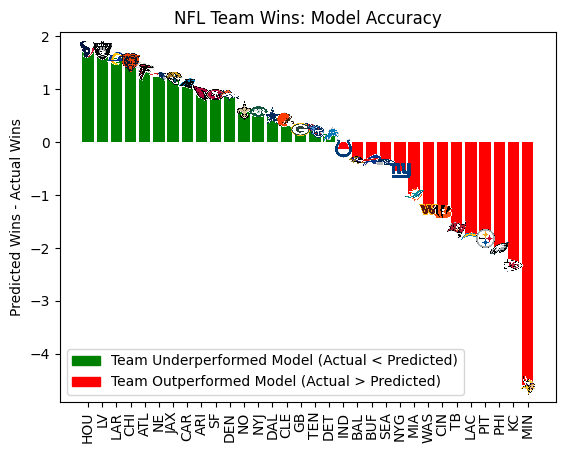

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(abbr_sorted, errors_sorted, color=['green' if x > 0 else 'red' for x in errors_sorted])


# Place images on top of the bars
for bar, img_path in zip(bars, logos_sorted):
    ab = AnnotationBbox(getImage(img_path),
                        (bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.2),
                        frameon=False,
                        box_alignment=(0.5, 0))
    ax.add_artist(ab)

# Add labels and title
ax.set_ylabel('Predicted Wins - Actual Wins')
ax.set_title('NFL Team Wins: Model Accuracy')

# Customize x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(abbr_sorted, rotation=90, ha='center')

# Create legend handles manually
handles = [
    plt.Rectangle((0, 0), 1, 1, color='green', label='Team Underperformed Model (Actual < Predicted)'),
    plt.Rectangle((0, 0), 1, 1, color='red', label='Team Outperformed Model (Actual > Predicted)')
]

# Add the legend
ax.legend(handles=handles)

# Show the plot
plt.show()
